In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('tracks_data.csv')

# Display the first few rows of the dataframe
df.head()

,genre,track_id,track_name,artist_name,tempo,danceability,energy,acousticness,duration_ms,instrumentalness,liveness,loudness,mode,speechiness,time_signature,valence
0,pop,3Dv1eDb0MEgF93GpLXlucZ,Say So,Doja Cat,110.962,0.787,0.673,0.2640,237893,0.000003,0.0904,-4.583,0,0.159,4,0.779
1,pop,7MXVkk9YMctZqd1Srtv4MB,Starboy,The Weeknd,186.003,0.679,0.587,0.1410,230453,0.000006,0.1370,-7.015,1,0.276,4,0.486
2,pop,0t3ZvGKlmYmVsDzBJAXK8C,Goodbyes (feat. Young Thug),Post Malone,150.097,0.547,0.653,0.4560,174853,0.000000,0.1030,-3.875,1,0.081,4,0.163
3,pop,7ytR5pFWmSjzHJIeQkgog4,ROCKSTAR (feat. Roddy Ricch),DaBaby,89.977,0.746,0.690,0.2470,181733,0.000000,0.1010,-7.956,1,0.164,4,0.497
4,pop,6DCZcSspjsKoFjzjrWoCdn,God's Plan,Drake,77.169,0.754,0.449,0.0332,198973,0.000083,0.5520,-9.211,1,0.109,4,0.357


In [2]:
# Check for duplicates and remove them
df = df.drop_duplicates(subset='track_id')

# Shuffle the data
df = df.sample(frac=1, random_state=420).reset_index(drop=True)

# Capture the unique genre labels before encoding
genre_labels = df['genre'].unique()

# Encode the genre as numerical values
df['genre'] = df['genre'].astype('category').cat.codes

# Separate features and target variable
X = df.drop(columns=['genre', 'track_id', 'track_name', 'artist_name'])
y = df['genre']

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=420)

# ML Models

## Logistic Regression

Best parameters for Logistic Regression: {'C': 1000, 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.7005376344086021
Logistic Regression Accuracy: 0.6896551724137931
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.75      0.75      0.75        24
           2       0.73      0.58      0.65        19
           3       0.61      0.82      0.70        17
           4       0.50      0.65      0.56        17
           5       0.62      0.45      0.53        22

    accuracy                           0.69       116
   macro avg       0.70      0.70      0.69       116
weighted avg       0.70      0.69      0.69       116



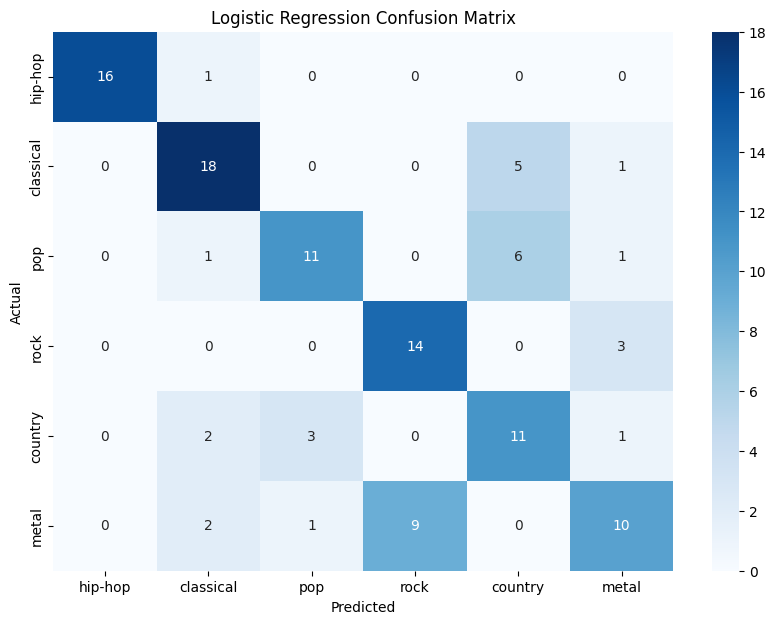

In [4]:
# Create a GridSearchCV parameter library to optimize
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs']
}

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
# Fit this model
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best score for Logistic Regression:", grid_search_lr.best_score_)
lrScore = grid_search_lr.best_score_
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
lrAccuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=genre_labels, yticklabels=genre_labels)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}
Best score for Random Forest: 0.743969144460028
Random Forest Accuracy: 0.7068965517241379
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.74      0.58      0.65        24
           2       0.67      0.74      0.70        19
           3       0.65      0.88      0.75        17
           4       0.64      0.53      0.58        17
           5       0.59      0.59      0.59        22

    accuracy                           0.71       116
   macro avg       0.71      0.72      0.71       116
weighted avg       0.71      0.71      0.70       116



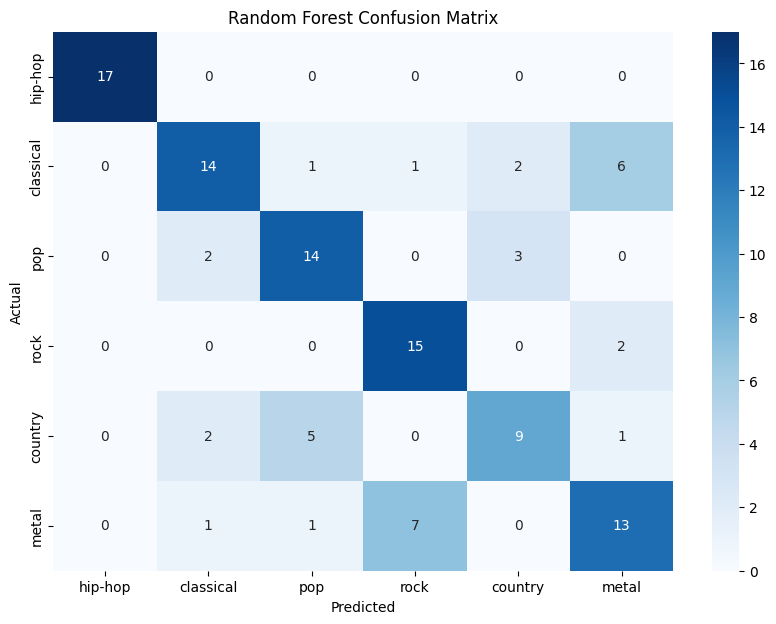

In [5]:
param_grid_rf = {
    'n_estimators': [25, 50, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
# Fit
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)
rfScore = grid_search_rf.best_score_
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
rfAccuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=genre_labels, yticklabels=genre_labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Support Vector Machine (SVM)

Best parameters for SVM: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best score for SVM: 0.6984104721832631
Random Forest Accuracy: 0.6810344827586207
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.78      0.75      0.77        24
           2       0.69      0.58      0.63        19
           3       0.65      0.65      0.65        17
           4       0.48      0.59      0.53        17
           5       0.57      0.59      0.58        22

    accuracy                           0.68       116
   macro avg       0.69      0.68      0.69       116
weighted avg       0.69      0.68      0.69       116



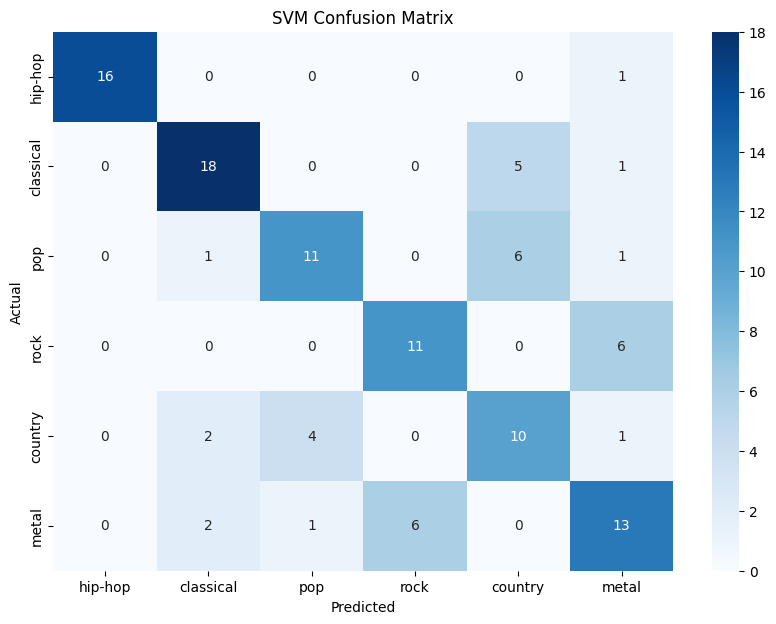

In [6]:
param_grid_svm = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# GridSearchCV object
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
# Fit
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)
svmScore = grid_search_svm.best_score_
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
svmAccuracy = accuracy_score(y_test, y_pred_svm)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=genre_labels, yticklabels=genre_labels)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best score for Decision Tree: 0.6334735857877514
Decision Tree Accuracy: 0.646551724137931
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.82      0.58      0.68        24
           2       0.61      0.58      0.59        19
           3       0.62      0.88      0.73        17
           4       0.41      0.71      0.52        17
           5       0.55      0.27      0.36        22

    accuracy                           0.65       116
   macro avg       0.67      0.67      0.65       116
weighted avg       0.67      0.65      0.64       116



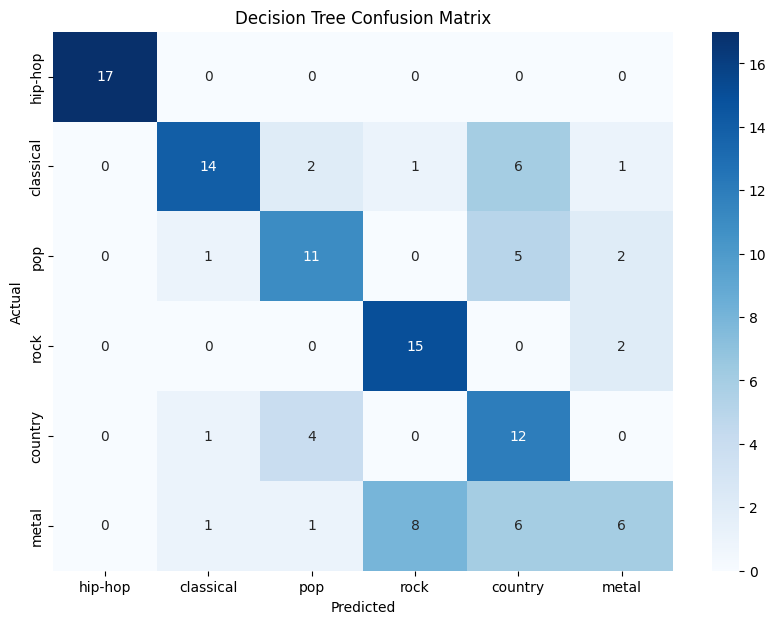

In [7]:
# Define the parameter grid
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 10, 20]
}

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')

# Fit the model
grid_search_dt.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best score for Decision Tree:", grid_search_dt.best_score_)
dtScore = grid_search_dt.best_score_
# Predict on the test set
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
dtAccuracy = accuracy_score(y_test, y_pred_dt)
# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=genre_labels, yticklabels=genre_labels)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## K-Nearest Neighbors (KNN)

Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best score for KNN: 0.6550490883590463
KNN Accuracy: 0.6120689655172413
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.58      0.62      0.60        24
           2       0.75      0.47      0.58        19
           3       0.63      0.71      0.67        17
           4       0.36      0.59      0.44        17
           5       0.60      0.41      0.49        22

    accuracy                           0.61       116
   macro avg       0.65      0.62      0.62       116
weighted avg       0.65      0.61      0.62       116



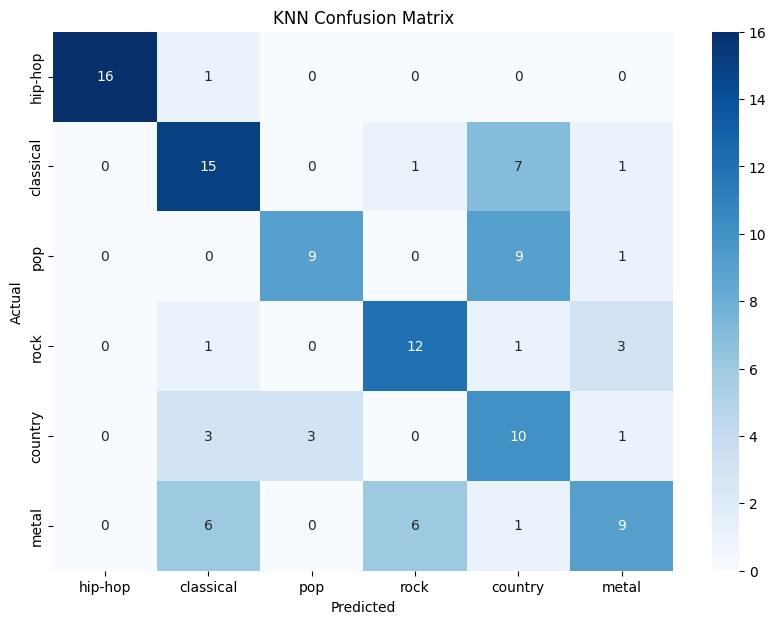

In [8]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create a GridSearchCV object
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best score for KNN:", grid_search_knn.best_score_)

# Predict on the test set
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=genre_labels, yticklabels=genre_labels)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualizing results

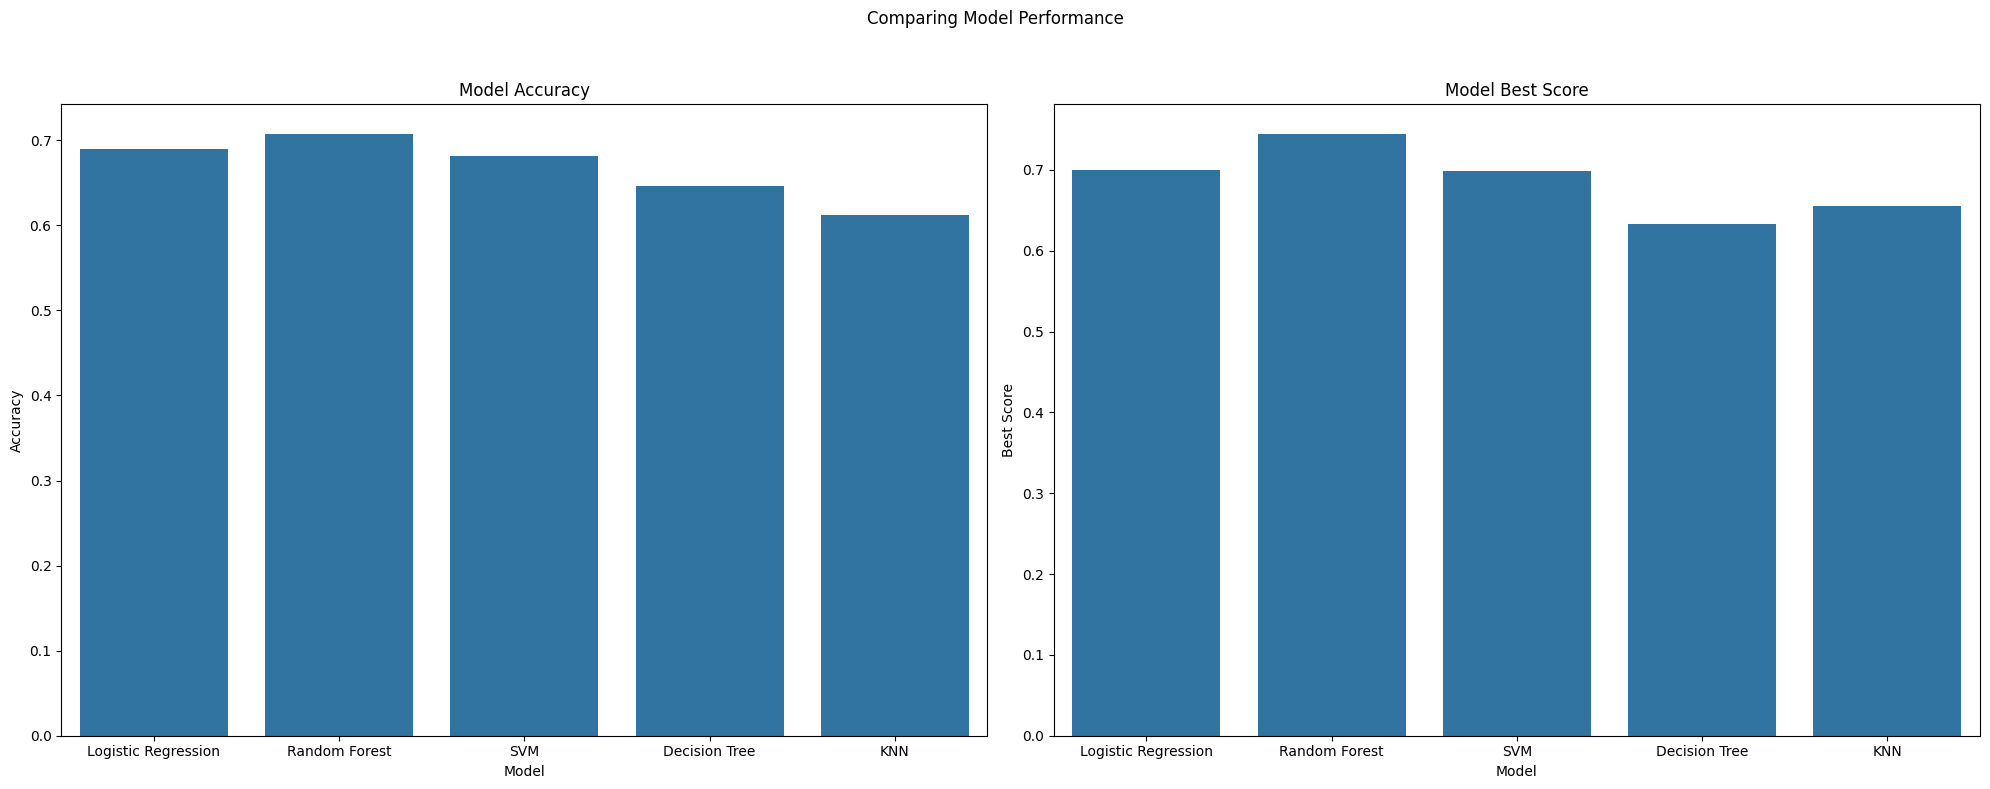

In [9]:
accuracyResults = {
    'Logistic Regression': lrAccuracy,
    'Random Forest': rfAccuracy,
    'SVM': svmAccuracy,
    'Decision Tree': dtAccuracy,
    'KNN': accuracy_score(y_test, y_pred_knn)
}
scoreResults = {
    'Logistic Regression': lrScore,
    'Random Forest': rfScore,
    'SVM': svmScore,
    'Decision Tree': dtScore,
    'KNN': grid_search_knn.best_score_
}
accuracyResults_df = pd.DataFrame.from_dict(accuracyResults, orient='index', columns=['Accuracy'])
scoreResults_df = pd.DataFrame.from_dict(scoreResults, orient='index', columns=['Score'])
accuracyResults_df.sort_values(by='Accuracy', ascending=False)
scoreResults_df.sort_values(by='Score', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(x=accuracyResults_df.index, y='Accuracy', data=accuracyResults_df, ax=axes[0])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Model')

sns.barplot(x=scoreResults_df.index, y='Score', data=scoreResults_df, ax=axes[1])
axes[1].set_title('Model Best Score')
axes[1].set_ylabel('Best Score')
axes[1].set_xlabel('Model')

fig.suptitle('Comparing Model Performance')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()